In [1]:
# https://github.com/LCAV/pyroomacoustics/blob/master/examples/noise_reduction_subspace.py

In [9]:
from pyroomacoustics.denoise import Subspace
import pyroomacoustics as pra
import time

In [55]:
import librosa
import os
BASE_FOLDER =  r'../../'
filepath = r'\dataset\6dB\fan\id_02\abnormal\00000002.wav'
ch, sr = librosa.load(os.path.abspath(BASE_FOLDER+filepath), sr=None, mono=False)
noisy_signal = ch[0]

In [56]:
%run -i ..\..\utility\feature_extractor\JupyterLoad_feature_extractor.py
def psd(d):
    psd = feature_extractor_welchPSD(BASE_FOLDER)
    mf = memory_wave_file()
    mf.filepath = filepath
    mf.srate = sr
    mf.channel = d
    psd.create_from_wav(mf)
    psd.plot()
   # plt.show()

load feature_extractor_mother
load feature_extractor_mel_spectra
load feature_extractor_psd
load feature_extractore_pre_nnFilterDenoise
load extractor_diagram_mother


In [57]:
from IPython.display import display, Markdown, Audio

In [58]:
frame_len = 80
mu = 10         # higher value can give more suppression but more distortion

# parameters for covariance matrix estimation
lookback = 10       # how many frames to look back
skip = 1            # how many samples to skip when estimating
threshold = 0.003    # threshold between (signal+noise) and noise
""" 
Create noise reduction object and apply the method
"""
scnr = Subspace(frame_len, mu, lookback, skip, threshold)

# parse signal as if streaming
processed_audio = np.zeros(noisy_signal.shape)
n = 0
start_time = time.time()
hop = frame_len // 2


noisy_signal = pra.normalize(noisy_signal)

n = 0
start_time = time.time()
while noisy_signal.shape[0] - n >= hop:

    processed_audio[n:n + hop, ] = scnr.apply(noisy_signal[n:n + hop])

    # update step
    n += hop




# end      
processed_audio = pra.normalize(processed_audio)
proc_time = time.time() - start_time
print("Processing time: {} minutes".format(proc_time/60))

Processing time: 0.2900302569071452 minutes


In [59]:
noisy_signal.shape[0] 

160000

#### orginal

#### denoised

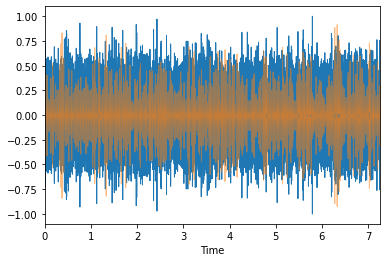

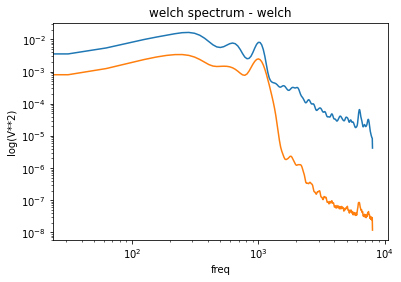

In [60]:
display(Markdown('#### ' + 'orginal'))
display(Audio(data=noisy_signal,rate=sr))




display(Markdown('#### ' + 'denoised'))
display(Audio(data=processed_audio,rate=sr))

librosa.display.waveplot(noisy_signal,sr)
librosa.display.waveplot(processed_audio,alpha=0.5)

plt.show()
psd([noisy_signal])
psd([processed_audio])

In [61]:
# check a nerror band filter on the 1K

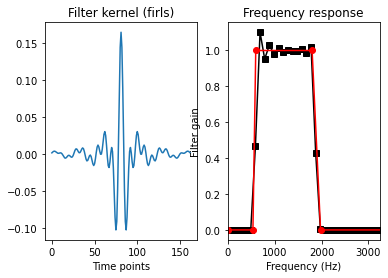

In [62]:
import scipy.signal as signal 
# define filter parameters
lower_bnd = 800 # Hz
upper_bnd = 1800 # Hz

lower_bnd = 200 # Hz
upper_bnd = 500 # Hz

lower_bnd = 600 # Hz
upper_bnd = 1800 # Hz

lower_trans = .1
upper_trans = .1

samprate  = sr # Hz
filtorder = 6*np.round(samprate/lower_bnd)+1

filter_shape = [ 0,0,1,1,0,0 ]
filter_freqs = [ 0, lower_bnd*(1-lower_trans), lower_bnd, upper_bnd, \
                upper_bnd+upper_bnd*upper_trans,  samprate/2 ]

filterkern = signal.firls(filtorder,filter_freqs,filter_shape,fs=samprate)
hz = np.linspace(0,samprate/2,int(np.floor(len(filterkern)/2)+1))
filterpow = np.abs(scipy.fftpack.fft(filterkern))**2


# let's see it
plt.subplot(121)
plt.plot(filterkern)
plt.xlabel('Time points')
plt.title('Filter kernel (firls)')


# plot amplitude spectrum of the filter kernel
plt.subplot(122)
plt.plot(hz,filterpow[:len(hz)],'ks-')
plt.plot(filter_freqs,filter_shape,'ro-')

# make the plot look nicer
plt.xlim([0,upper_bnd*1.8])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter gain')
plt.title('Frequency response')
plt.show()


#### orginal

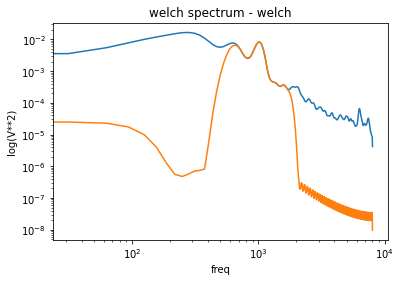

In [63]:
filt_noisy = signal.filtfilt(filterkern,1,noisy_signal)
psd([noisy_signal])
psd([filt_noisy])
display(Markdown('#### ' + 'orginal'))
display(Audio(data=filt_noisy,rate=sr))